CS 4661 - 02
Introduction to Data Science

<h1>What's Cooking</h1>
Using recipe ingredients to categorize the cuisine

<hr>

Yara Ajjawi, Dean Baquir, Martha Caldera, Jennelle Maximo, Erica Santos

<hr>

<h1> Importing Libraries </h1>

In [60]:
# import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

<h1>Dataset Overview </h1>

<h3>Training data</h3>

In [61]:
df_train = pd.read_json('../Whats-Cooking-main/train.json')
df_train

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


<h3>Testing data</h3>

In [62]:
df_test = pd.read_json('../Whats-Cooking-main/test.json')
df_test

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."


In [63]:
print("Size of training data:", df_train.shape)
print("Size of testing data:", df_test.shape)

Size of training data: (39774, 3)
Size of testing data: (9944, 2)


<h1>Features and Label </h1>

In [64]:
# choose columns that are features
features = ['ingredients']

# dataset of features, X
X = df_train[features] 

# dataset of labels, y
y = df_train['cuisine']

# print the first 5 rows of each set
print(X.head())
print("--------")
print(y.head())

                                         ingredients
0  [romaine lettuce, black olives, grape tomatoes...
1  [plain flour, ground pepper, salt, tomatoes, g...
2  [eggs, pepper, salt, mayonaise, cooking oil, g...
3                [water, vegetable oil, wheat, salt]
4  [black pepper, shallots, cornflour, cayenne pe...
--------
0          greek
1    southern_us
2       filipino
3         indian
4         indian
Name: cuisine, dtype: object


<h1>Training the model</h1>

In [65]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85)
X_train.shape, X_val.shape

((33807, 1), (5967, 1))

<h1>Exploring the data</h1>

<h3>How many number of cuisines are there?</h3>

In [66]:
#How many number of cuisines are there?

listOfCuisines = df_train.cuisine.unique()
print(listOfCuisines, "\n")
print("Number of cuisines : ", len(listOfCuisines))

['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian'] 

Number of cuisines :  20


<h3>How many unique ingredients are there?</h3>

In [67]:
#How many unique ingredients are there?

# combines all the ingredient arrays into 1 large array, contains ingredient repeats
listOfAllIngred = []
listOfIngred = df_train.ingredients
for i in range(0,len(listOfIngred)):
    for j in range(0,len(listOfIngred[i])):
        listOfAllIngred.append(listOfIngred[i][j])
        
print("Number of total ingredients : ",len(listOfAllIngred))

listOfUniqueIngred = list(dict.fromkeys(listOfAllIngred))

print("Number of unique ingredients : ", len(listOfUniqueIngred))

Number of total ingredients :  428275
Number of unique ingredients :  6714


<h3>How many ingredients does each recipe have?</h3>

In [68]:
print('Maximum Number of Ingredients in a recipe: ',df_train['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a recipe: ',df_train['ingredients'].str.len().min())

Maximum Number of Ingredients in a recipe:  65
Minimum Number of Ingredients in a recipe:  1


In [69]:
df_train['ing_count'] = df_train['ingredients'].str.len()

df_train[df_train['ing_count'] >= 60]

,id,cuisine,ingredients,ing_count
15289,3885,italian,"[fettucine, fresh marjoram, minced garlic, oli...",65


In [70]:
df_train[df_train['ing_count'] <= 1]

,id,cuisine,ingredients,ing_count
940,4734,japanese,[sushi rice],1
2088,7833,vietnamese,[dried rice noodles],1
6787,36818,indian,[plain low-fat yogurt],1
7011,19772,indian,[unsalted butter],1
8181,16116,japanese,[udon],1
8852,29738,thai,[sticky rice],1
8990,41124,indian,[butter],1
10506,32631,mexican,[corn tortillas],1
13178,29570,thai,[grained],1
17804,29849,southern_us,[lemonade concentrate],1


<h3>Which cuisine is the most popular?</h3>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'italian'),
  Text(1, 0, 'mexican'),
  Text(2, 0, 'southern_us'),
  Text(3, 0, 'indian'),
  Text(4, 0, 'chinese'),
  Text(5, 0, 'french'),
  Text(6, 0, 'cajun_creole'),
  Text(7, 0, 'thai'),
  Text(8, 0, 'japanese'),
  Text(9, 0, 'greek'),
  Text(10, 0, 'spanish'),
  Text(11, 0, 'korean'),
  Text(12, 0, 'vietnamese'),
  Text(13, 0, 'moroccan'),
  Text(14, 0, 'british'),
  Text(15, 0, 'filipino'),
  Text(16, 0, 'irish'),
  Text(17, 0, 'jamaican'),
  Text(18, 0, 'russian'),
  Text(19, 0, 'brazilian')])

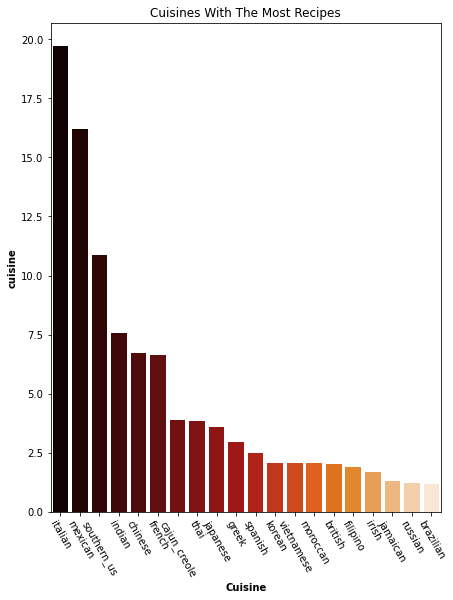

In [71]:
import warnings
warnings.filterwarnings('ignore')

temp = train['cuisine'].value_counts()
x = temp / temp.sum() * 100
y = temp.index
plt.figure(figsize = (7,9))

plt.title('Cuisines With The Most Recipes')
plt.xlabel('Cuisine', fontweight ='bold')
plt.ylabel('Recipe Count', fontweight ='bold')
sns.barplot(y, x, data = train, palette = "gist_heat")
plt.xticks(rotation = -60)

<h1>Turning our data to numerical values to find accuracy</h1>

__Create list of words in each recipe row__

In [72]:
# split into training set and testing set

# training set
ingredients_train = df_train.ingredients
words_train = [' '.join(x) for x in ingredients_train]
print(len(words_train), words_train[0])

# test set
ingredients_test = df_test.ingredients
words_test = [' '.join(x) for x in ingredients_test]

39774 romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles


__Create a word vector based on the training set__

In [73]:
vectorizer = CountVectorizer(max_features = 1000)
bag_of_words = vectorizer.fit(words_train)
bag_of_words

CountVectorizer(max_features=1000)

__Transform the word lists into vectors using the vectorizer trained on the training data__

In [74]:
ing_array_train = bag_of_words.transform(words_train).toarray()
ing_array_test = bag_of_words.transform(words_test).toarray()
ing_array_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

__Incorporate the word vectors into the train and test dataframes__

In [75]:
df_ing_train = pd.DataFrame(ing_array_train, columns=vectorizer.vocabulary_)
df_ing_test = pd.DataFrame(ing_array_test, columns=vectorizer.vocabulary_)
df_ing_train.head()

,romaine,lettuce,black,olives,grape,tomatoes,garlic,pepper,purple,onion,...,liver,muffin,stick,chow,fusilli,fronds,flavor,fajita,chayotes,american
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [76]:
df_train_new = df_train.merge(df_ing_train, 
                          left_index=True, 
                          right_index=True).drop('ingredients', axis=1)
df_train_new.head()

,id,cuisine,ing_count,romaine,lettuce,black,olives,grape,tomatoes,garlic,...,liver,muffin,stick,chow,fusilli,fronds,flavor,fajita,chayotes,american
0,10259,greek,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,20130,filipino,12,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,22213,indian,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,20,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
df_test_new = df_test.merge(df_ing_test, 
                          left_index=True, 
                          right_index=True).drop('ingredients', axis=1)
df_test_new.head()

,id,romaine,lettuce,black,olives,grape,tomatoes,garlic,pepper,purple,...,liver,muffin,stick,chow,fusilli,fronds,flavor,fajita,chayotes,american
0,18009,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28583,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,41580,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29752,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,35687,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Create sets__

In [78]:
X = df_train_new.drop(['id', 'cuisine'], axis=1)
y = df_train_new.cuisine
X.shape, y.shape

((39774, 1001), (39774,))

In [79]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85)
X_train.shape, X_val.shape

((33807, 1001), (5967, 1001))

<h1>KNN & Random Forest Classifications</h1>

__Create random forest, KNN__

In [80]:
# import dependencies
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators=19, bootstrap=True, random_state=3)
my_RandomForest.fit(X_train, y_train)

my_knn = KNeighborsClassifier(n_neighbors=5)
my_knn.fit(X_train, y_train)

KNeighborsClassifier()

<h1>Accuracies & Predictions</h1>

<h3>Accuracies</h3>

In [81]:
y_predict_knn = my_knn.predict(X_val)
my_rf_predict = my_RandomForest.predict(X_val)

knn_accuracy = accuracy_score(y_val, y_predict_knn)
rf_accuracy = accuracy_score(y_val, my_rf_predict)

print("random forrest accuracy", rf_accuracy)
print("knn accuracy", knn_accuracy)

random forrest accuracy 0.7286743757331993
knn accuracy 0.6559410088821853


<h3>KNN Predictions</h3>

In [82]:
# checking the results of knn prediction compared to the actal set
results = pd.DataFrame()

results['actual'] = y_val 
results['prediction'] = y_predict_knn 

print(results)

        actual prediction
31432  mexican    mexican
29133  italian    italian
28820  mexican    mexican
14285   indian     indian
33641  spanish    spanish
...        ...        ...
32650  chinese    italian
35568  mexican    mexican
23195    irish     korean
12685  spanish    spanish
25249  italian    italian

[5967 rows x 2 columns]


<h3>Random Forest Predictions</h3>

In [83]:
# checking the results of random forest prediction compared to the actal set
resultsRF = pd.DataFrame()

resultsRF['actual'] = y_val 
resultsRF['prediction'] = my_rf_predict 

print(resultsRF)

        actual prediction
31432  mexican    mexican
29133  italian    italian
28820  mexican    mexican
14285   indian     indian
33641  spanish    spanish
...        ...        ...
32650  chinese    italian
35568  mexican    mexican
23195    irish   japanese
12685  spanish    spanish
25249  italian    italian

[5967 rows x 2 columns]
